In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



In [2]:
pd.options.display.max_colwidth = 200 
plt.rcParams['figure.dpi'] = 120 

In [3]:
def preprocess(text):
    """
        Preprocesses the input text by removing non-alphanumeric characters,
        converting to lowercase, removing URLs and links,
        tokenizing, lemmatizing, and filtering out stopwords.
    """
    
    # Remove URLs and links using regular expressions
    text = re.sub(r"http\S+|www\S+|pic.twitter\S+|\S+.com\S+", "", text, flags=re.MULTILINE)
    # Split the text into sentences using newline and tab characters as separators
    sentences = re.split("[\n\t]", text)
    # Remove any empty lines from the list of sentences
    sentences = [sentence for sentence in sentences if sentence]
    # Further cleaning: Remove non-alphanumeric characters and convert to lowercase
    sentences = [re.sub(r"[^0-9a-zA-Z\s]", "", sentence, re.I | re.A).lower() for sentence in sentences]
    # Lowercase and strip leading/trailing whitespaces for each sentence
    sentences = [sentence.lower().strip() for sentence in sentences]

    # Tokenize each sentence using WordPunctTokenizer from NLTK
    # and then apply lemmatizer
    wpt = nltk.WordPunctTokenizer()
    lemmatizer = WordNetLemmatizer()
    # Get the list of stopwords in English from NLTK
    stop_words = nltk.corpus.stopwords.words("english")
    output = []
    # For each sentence, tokenize, lemmatize, and filter out stopwords to create a new list of tokens
    for sentence in sentences:
        tokens = wpt.tokenize(sentence)
        # Lemmatize each word using WordNetLemmatizer
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        # Join the lemmatized tokens into a sentence and append it to the output list
        output.append(" ".join(lemmatized_tokens))

    # Join all the processed sentences into a single text string
    return " ".join(output)



In [4]:
def prepare_df(path):
    """
    Summary:
        Reads the CSV file at the specified path into a Pandas DataFrame,
        drops the 'keyword' and 'location' columns, and applies the preprocess
        function to the 'text' column, creating a new 'preproc' column.
    """
    # Read the CSV file into a Pandas DataFrame, using 'id' as the index column
    df = pd.read_csv(path, index_col="id")
    # Drop the 'keyword' and 'location' columns from the DataFrame
    df = df.drop(["keyword", "location"], axis=1)
    # Apply the preprocess function to the 'text' column and store the result in a new column 'preproc'
    df["preproc"] = df["text"].apply(preprocess)
    return df



In [5]:
def plot_conf_matrix(conf_matrix, unique_classes=[0,1]):
    # Create a DataFrame from the confusion matrix
    conf_df = pd.DataFrame(conf_matrix, columns=unique_classes, index=unique_classes)
    # Create a heatmap of the confusion matrix
    # Nice cmap`s: "Greys", "bone_r"
    sns.heatmap(conf_df, annot=True, fmt='', cmap='Greys')
    # Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    # Show the plot
    plt.show()

# Explore

In [6]:
df = prepare_df("train.csv")
test_df = prepare_df("test.csv")
df.head(20)

,text,target,preproc
id,,,
1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u
4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected
6,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order california
7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school
8,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire
10,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,flood disaster heavy rain cause flash flooding street manitou colorado spring area
13,I'm on top of the hill and I can see a fire in the woods...,1,im top hill see fire wood
14,There's an emergency evacuation happening now in the building across the street,1,there emergency evacuation happening building across street


## Plot Value Count per Target

Text(0.5, 1.0, 'Value Counts')

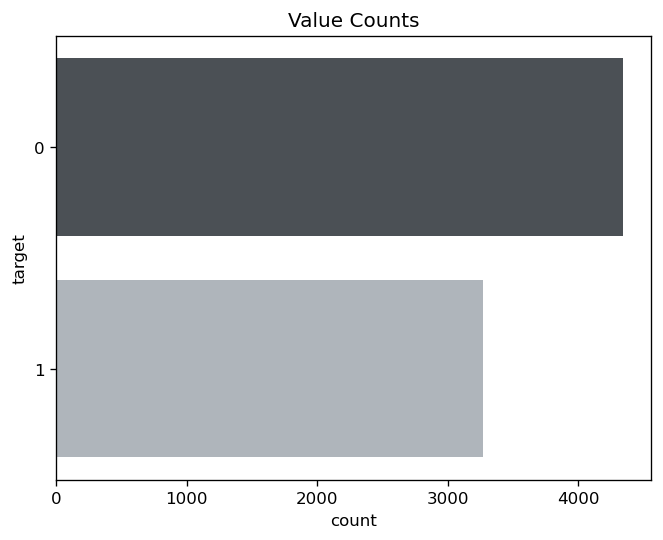

In [7]:
# associate color to target
colours = {0: "#495057", 1: "#ADB5BD"}
sns.countplot(data=df, y="target", palette=colours)
plt.title("Value Counts")

## Most Common Words per Target

            Frequency
fire              264
news              136
via               121
disaster          117
california        115
suicide           110
people            106
police            106
family            105
amp               105
u                 104
home              100
train             100
building           94
killed             93
like               92
storm              91
bomb               91
crash              89
hiroshima          87
        Frequency
like          255
im            247
amp           191
get           185
new           170
dont          153
u             142
one           135
body          117
time          103
video         102
via            99
would          96
love           95
people         93
day            92
go             91
know           90
fire           88
2              86


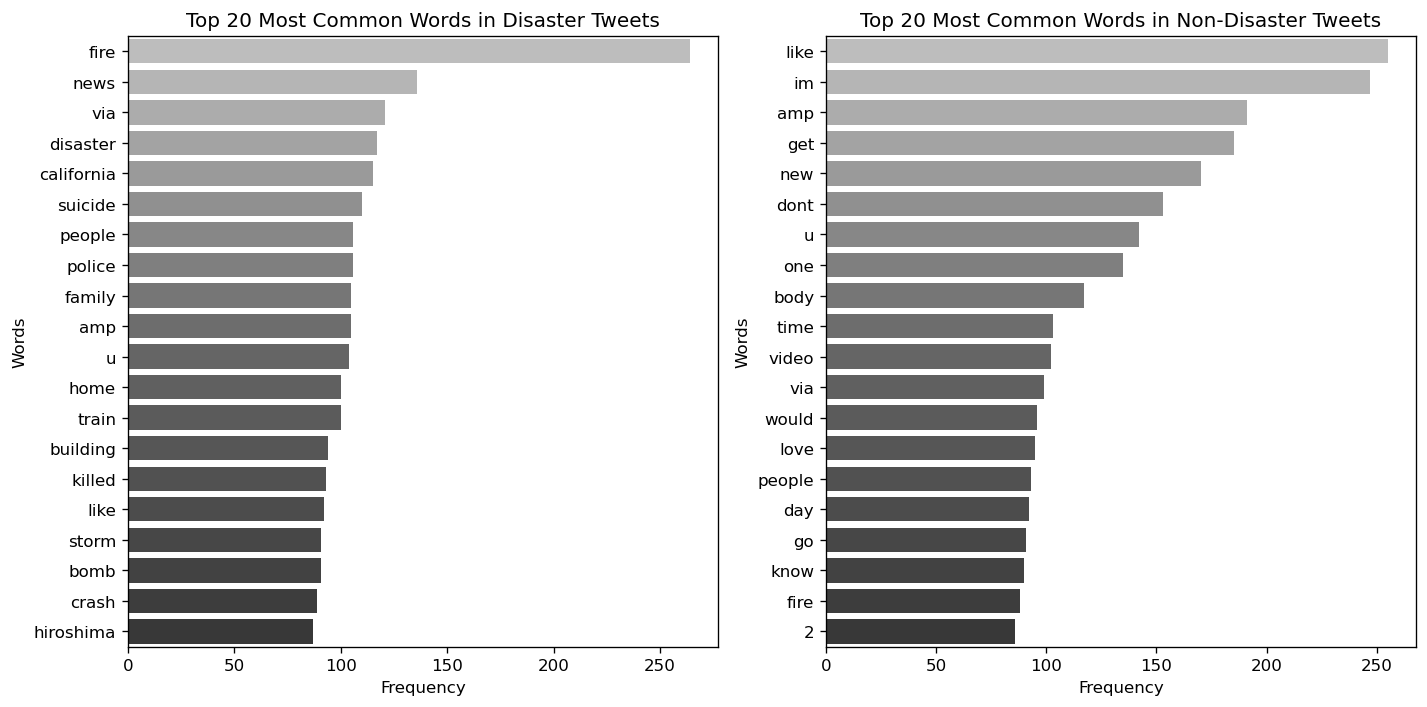

In [8]:
# Separate the data into disaster and non-disaster categories
disaster_df = df[df["target"] == 1]
non_disaster_df = df[df["target"] == 0]

# Tokenize the preprocessed text into individual words for each category
disaster_word_lists = [sentence.split() for sentence in disaster_df["preproc"]]
non_disaster_word_lists = [sentence.split() for sentence in non_disaster_df["preproc"]]

# Count the occurrences of each word for each category
disaster_word_count = {}
for word_list in disaster_word_lists:
    for word in word_list:
        if word in disaster_word_count:
            disaster_word_count[word] += 1
        else:
            disaster_word_count[word] = 1
            
non_disaster_word_count = {}
for word_list in non_disaster_word_lists:
    for word in word_list:
        if word in non_disaster_word_count:
            non_disaster_word_count[word] += 1
        else:
            non_disaster_word_count[word] = 1

# Sort the words based on their frequency for each category
sorted_disaster_word_count = dict(sorted(disaster_word_count.items(), key=lambda item: item[1], reverse=True))
sorted_non_disaster_word_count = dict(sorted(non_disaster_word_count.items(), key=lambda item: item[1], reverse=True))

# Convert the word frequencies into DataFrames for plotting
disaster_word_freq_df = pd.DataFrame.from_dict(sorted_disaster_word_count, orient='index', columns=['Frequency'])
non_disaster_word_freq_df = pd.DataFrame.from_dict(sorted_non_disaster_word_count, orient='index', columns=['Frequency'])

# Get the top N most common words for each category (you can change the value of N as per your requirement)
N = 20
top_N_disaster_words = disaster_word_freq_df.head(N)
print(top_N_disaster_words)
top_N_non_disaster_words = non_disaster_word_freq_df.head(N)
print(top_N_non_disaster_words)

# Plot the horizontal bar plots using Seaborn
plt.figure(figsize=(12, 6))
# Set the grayscale palette for the bar plots
gray_palette = sns.color_palette("Greys_d", N)

# Plot for disaster tweets
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y=top_N_disaster_words.index, data=top_N_disaster_words, palette=gray_palette)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {N} Most Common Words in Disaster Tweets')

# Plot for non-disaster tweets
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y=top_N_non_disaster_words.index, data=top_N_non_disaster_words, palette=gray_palette)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {N} Most Common Words in Non-Disaster Tweets')

plt.tight_layout()
plt.show()


## Discover length of preprocessed messages

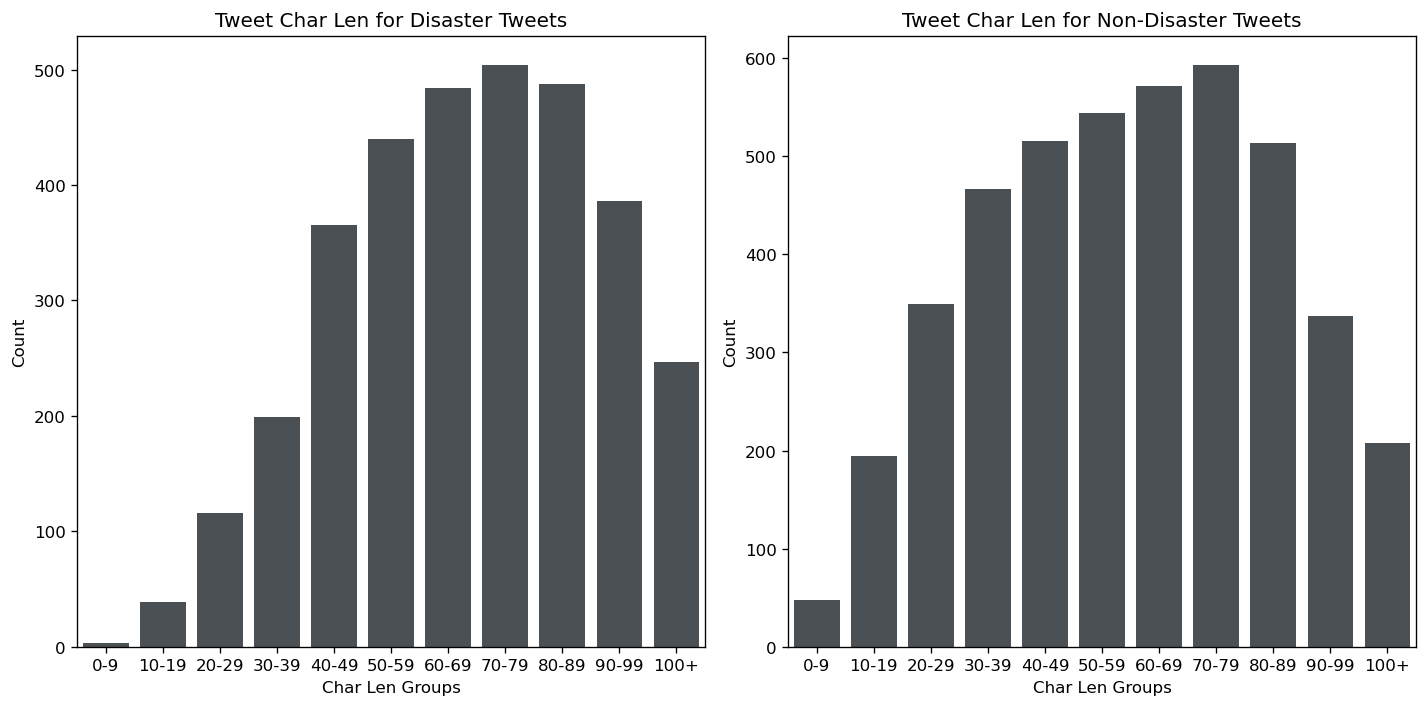

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to group character lengths into the specified groups
def group_character_lengths(lengths):
    bins = [i * 10 for i in range(11)] + [float('inf')]
    labels = [f"{i}-{i+9}" if i < 100 else f"{i}+" for i in bins[:-1]]
    return pd.cut(lengths, bins=bins, labels=labels, right=False)

# Count character lengths for disaster_df
disaster_df_copy = disaster_df.copy()
disaster_df_copy['preproc_len'] = disaster_df['preproc'].str.len()
disaster_lengths_grouped = group_character_lengths(disaster_df_copy['preproc_len'])
disaster_lengths_count = disaster_lengths_grouped.value_counts().sort_index()

# Count character lengths for non_disaster_df
non_disaster_df_copy = non_disaster_df.copy()
non_disaster_df_copy['preproc_len'] = non_disaster_df['preproc'].str.len()
non_disaster_lengths_grouped = group_character_lengths(non_disaster_df_copy['preproc_len'])
non_disaster_lengths_count = non_disaster_lengths_grouped.value_counts().sort_index()

# Plot the results
# Pick a decent enough shade of gray
plot_color = colours[0]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=disaster_lengths_count.index, y=disaster_lengths_count.values, color=plot_color)
plt.xlabel('Char Len Groups')
plt.ylabel('Count')
plt.title('Tweet Char Len for Disaster Tweets')

plt.subplot(1, 2, 2)
sns.barplot(x=non_disaster_lengths_count.index, y=non_disaster_lengths_count.values, color=plot_color)
plt.xlabel('Char Len Groups')
plt.ylabel('Count')
plt.title('Tweet Char Len for Non-Disaster Tweets')

plt.tight_layout()
plt.show()

# Use TF-IDF to prepare preprocessed text to be put into model(Feature extraction). Then split into training and validation sets

In [19]:
tv = TfidfVectorizer()
tv_train_features = tv.fit_transform(df["preproc"])
tv_test_features = tv.transform(test_df["preproc"])
X_train, X_val, y_train, y_val = train_test_split(tv_train_features, df["target"], test_size=0.25, random_state=42)


# Use SMOTE algorithm to handle imbalance

In [20]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2622
Before OverSampling, counts of label '0': 3468 



After OverSampling, the shape of train_X: (6936, 16210)
After OverSampling, the shape of train_y: (6936,) 

After OverSampling, counts of label '1': 3468
After OverSampling, counts of label '0': 3468


# Choose ML model, train it, and look at its performance

In [21]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class with specified parameters
log_reg = LogisticRegression(solver='lbfgs', random_state=0)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Calculate accuracy on the training and validation sets
train_acc = log_reg.score(X_train, y_train)
val_acc = log_reg.score(X_val, y_val)

# Generate prediction on the validation set
val_predicted = log_reg.predict(X_val)

# Generate classification report and confusion matrix for the validation set
val_report = classification_report(y_val, val_predicted)
val_conf_matrix = confusion_matrix(y_val, val_predicted)

# Calculate cross-validation scores
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean_cv_score = np.mean(log_reg_cv_scores)

print('Train Accuracy:', train_acc)
print('Validation Accuracy:', val_acc)
print('Precision, Recall, and F1-score (validation):')
print(val_report)
print('Confusion Matrix (validation):')
print(val_conf_matrix)
print('CV Accuracy (5-fold):', log_reg_cv_scores)
print('Mean CV Accuracy:', log_reg_mean_cv_score)

Train Accuracy: 0.89376026272578
Validation Accuracy: 0.7931713722915299
Precision, Recall, and F1-score (validation):
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       874
           1       0.84      0.63      0.72       649

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Confusion Matrix (validation):
[[797  77]
 [238 411]]
CV Accuracy (5-fold): [0.78981938 0.80870279 0.81034483 0.77668309 0.78407225]
Mean CV Accuracy: 0.7939244663382594


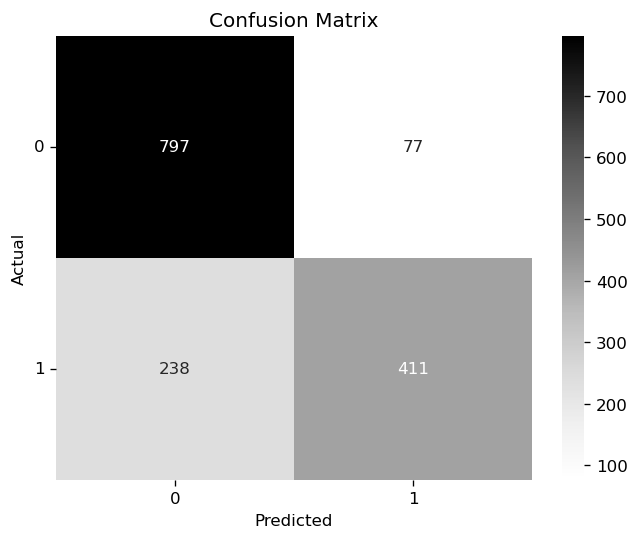

In [22]:
plot_conf_matrix(val_conf_matrix)

In [23]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Naive Bayes class with specified parameters
n_b = MultinomialNB() 

# Fit the model on the training data
n_b.fit(X_train, y_train)

# Calculate accuracy on the training and validation sets
train_acc = n_b.score(X_train, y_train)
val_acc = n_b.score(X_val, y_val)

# Generate prediction on the validation set
val_predicted = n_b.predict(X_val)

# Generate classification report and confusion matrix for the validation set
val_report = classification_report(y_val, val_predicted)
val_conf_matrix = confusion_matrix(y_val, val_predicted)

# Calculate cross-validation scores
n_b_cv_scores = cross_val_score(n_b, X_train, y_train, cv=5)
n_b_mean_cv_score = np.mean(n_b_cv_scores)

print('Train Accuracy:', train_acc)
print('Validation Accuracy:', val_acc)
print('Precision, Recall, and F1-score (validation):')
print(val_report)
print('Confusion Matrix (validation):')
print(val_conf_matrix)
print('CV Accuracy (5-fold):', n_b_cv_scores)
print('Mean CV Accuracy:', n_b_mean_cv_score)

Train Accuracy: 0.90311986863711
Validation Accuracy: 0.799080761654629
Precision, Recall, and F1-score (validation):
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix (validation):
[[780  94]
 [212 437]]
CV Accuracy (5-fold): [0.7955665  0.79392447 0.80131363 0.79228243 0.78735632]
Mean CV Accuracy: 0.7940886699507388


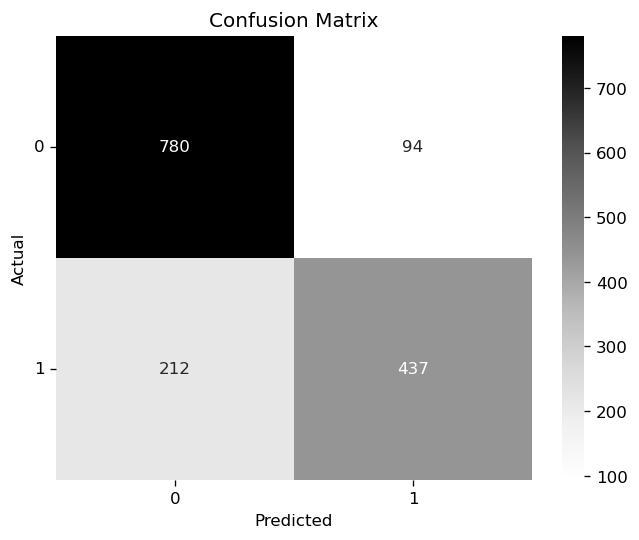

In [24]:
plot_conf_matrix(val_conf_matrix)

In [25]:
from sklearn import model_selection, svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

# Calculate accuracy on the training and validation sets
train_acc = SVM.score(X_train, y_train)
val_acc = SVM.score(X_val, y_val)

# Generate prediction on the validation set
val_predicted = SVM.predict(X_val)

# Generate classification report and confusion matrix for the validation set
val_report = classification_report(y_val, val_predicted)
val_conf_matrix = confusion_matrix(y_val, val_predicted)

# Calculate cross-validation scores
SVM_cv_scores = cross_val_score(SVM, X_train, y_train, cv=5)
SVM_mean_cv_score = np.mean(SVM_cv_scores)

print('Train Accuracy:', train_acc)
print('Validation Accuracy:', val_acc)
print('Precision, Recall, and F1-score (validation):')
print(val_report)
print('Confusion Matrix (validation):')
print(val_conf_matrix)
print('CV Accuracy (5-fold):', SVM_cv_scores)
print('Mean CV Accuracy:', SVM_mean_cv_score)

Train Accuracy: 0.9369458128078818
Validation Accuracy: 0.8003939592908733
Precision, Recall, and F1-score (validation):
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       874
           1       0.81      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix (validation):
[[767 107]
 [197 452]]
CV Accuracy (5-fold): [0.79474548 0.80623974 0.80788177 0.78078818 0.78407225]
Mean CV Accuracy: 0.7947454844006567


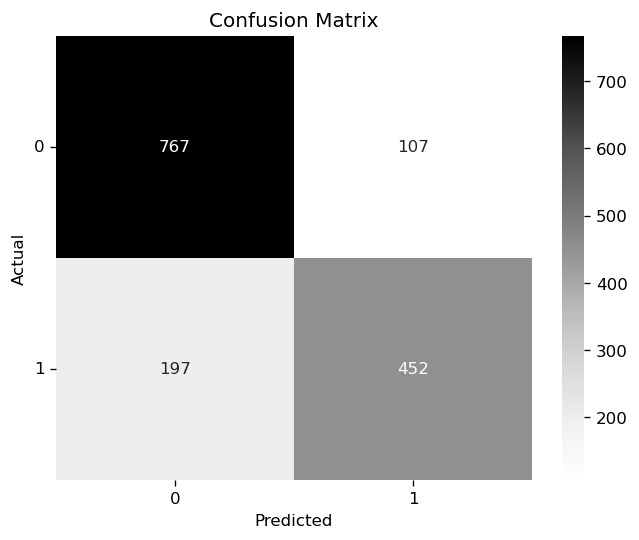

In [26]:
plot_conf_matrix(val_conf_matrix)

## We use the recall to check how well the correctness of our model is . Recall summarizes how well the positive quanitity of the class is predicted.

## Since SVM has better recall values for both classes , it is used as the model for this particular dataset

In [28]:
test_set = SVM.predict(tv_test_features)

In [31]:
np.count_nonzero(test_set==1)

1199

In [33]:
np.count_nonzero(test_set==0)

2064